In [1]:
import plotly.express as px
import os
import pandas as pd
import folium
import mysql.connector
import plotly.express as px
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read in and clean data from 2020 world happiness report
df2020 = pd.read_csv("world_happiness_report_2020.csv")
df2020.columns = df2020.iloc[0]
df2020.drop([0], inplace = True)

for i in range(2,20):
    df2020.iloc[:, i] = pd.to_numeric(df2020.iloc[:, i], downcast = "float")
    
df2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
1,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
2,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
3,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
4,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
5,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
150,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
151,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
152,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [3]:
#minimum, maximum, and mean happiness scores across all 153 countries in dataset
maxhappy = df2020["Ladder score"].max()
minhappy = df2020["Ladder score"].min()
meanhappy = df2020["Ladder score"].mean()
print("Highest Happiness Score:", maxhappy)
print("Lowest Happiness Score:", minhappy)
print("Mean Happiness Score:", meanhappy)

Highest Happiness Score: 7.8087
Lowest Happiness Score: 2.5669
Mean Happiness Score: 5.4732394


In [4]:
#display 10 countries with highest happiness scores
dfoverall = pd.DataFrame()
dfoverall["Country"] = df2020["Country name"]
dfoverall["Happiness Score"] = df2020["Ladder score"]
dfoverall.sort_values(by = "Happiness Score", ascending = False)
print("Top 10 'Happiest' Countries")
dfoverall.head(10)

Top 10 'Happiest' Countries


,Country,Happiness Score
1,Finland,7.8087
2,Denmark,7.6456
3,Switzerland,7.5599
4,Iceland,7.5045
5,Norway,7.4880
6,Netherlands,7.4489
7,Sweden,7.3535
8,New Zealand,7.2996
9,Austria,7.2942
10,Luxembourg,7.2375


In [5]:
#display 10 countries with lowest happiness scores
print("Top 10 'Most Unhappy' Countries")
dfoverall.tail(10)

Top 10 'Most Unhappy' Countries


,Country,Happiness Score
144,India,3.5733
145,Malawi,3.5380
146,Yemen,3.5274
147,Botswana,3.4789
148,Tanzania,3.4762
149,Central African Republic,3.4759
150,Rwanda,3.3123
151,Zimbabwe,3.2992
152,South Sudan,2.8166
153,Afghanistan,2.5669


In [53]:
#split overall dataframe into dataframes by region
we = df2020[df2020["Regional indicator"] == "Western Europe"]
naa = df2020[df2020["Regional indicator"] == "North America and ANZ"]
mena = df2020[df2020["Regional indicator"] == "Middle East and North Africa"]
lac = df2020[df2020["Regional indicator"] == "Latin America and Caribbean"]
cee = df2020[df2020["Regional indicator"] == "Central and Eastern Europe"]
ea = df2020[df2020["Regional indicator"] == "East Asia"]
sea = df2020[df2020["Regional indicator"] == "Southeast Asia"]
cis = df2020[df2020["Regional indicator"] == "Commonwealth of Independent States"]
ssa = df2020[df2020["Regional indicator"] == "Sub-Saharan Africa"]
sa = df2020[df2020["Regional indicator"] == "South Asia"]

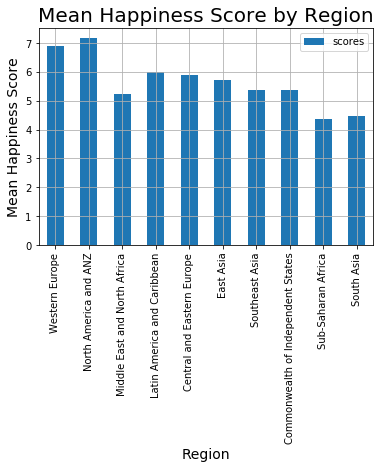

In [7]:
#create dataframe dfr with mean happiness score by region and plot on bar chart
regions = [we, naa, mena, lac, cee, ea, sea, cis, ssa, sa]
regionscores = []
for r in regions:
    regionscores.append(r["Ladder score"].mean())

regionames = []
for n in regions:
    regionames.append(n.iloc[1,1])
    
dfr = pd.DataFrame()
dfr["regions"] = regionames
dfr["scores"] = regionscores

dfr.plot(kind = "bar", x = "regions", y = "scores")
plt.title("Mean Happiness Score by Region", fontsize = 20)
plt.xlabel("Region", fontsize = 14)
plt.ylabel("Mean Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

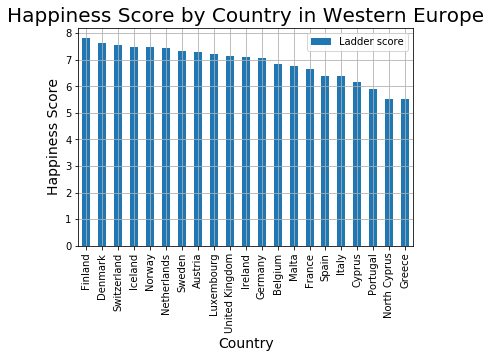

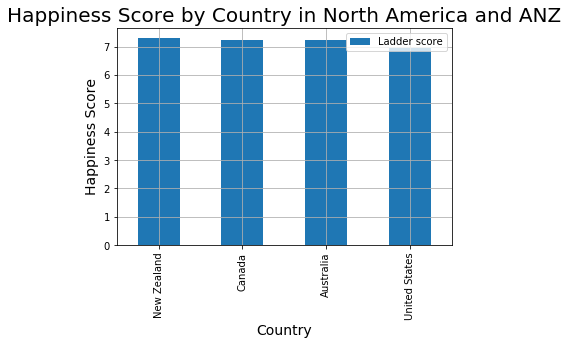

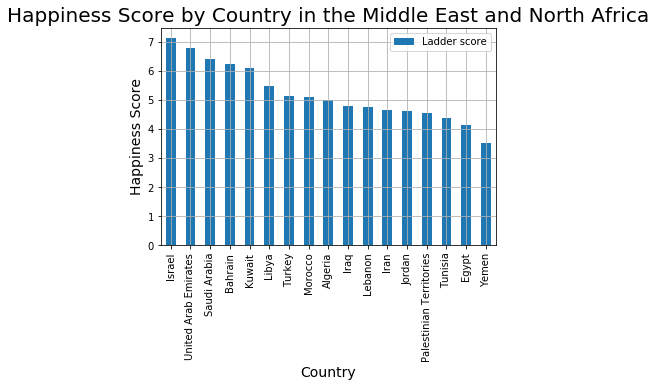

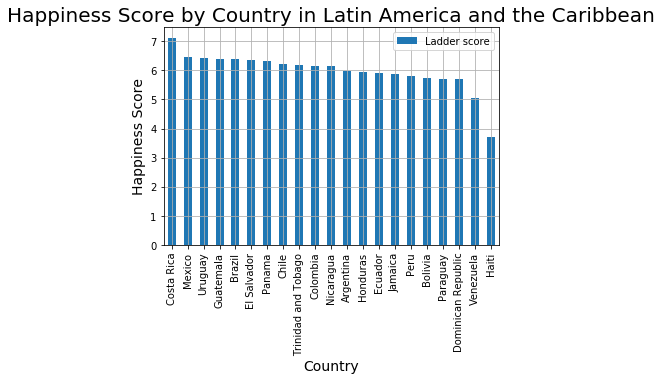

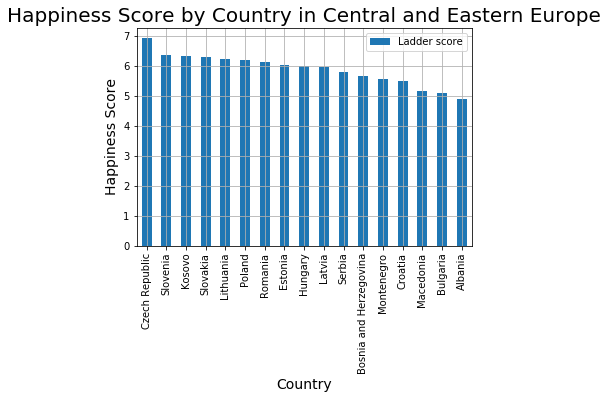

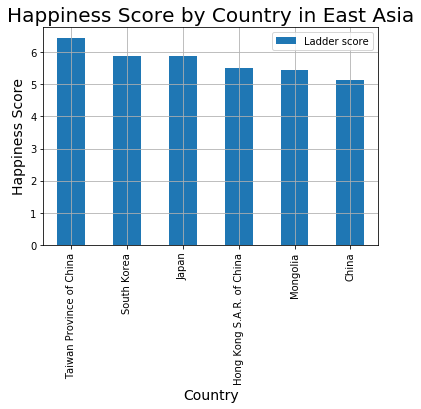

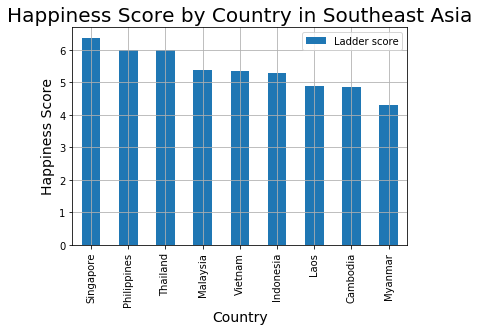

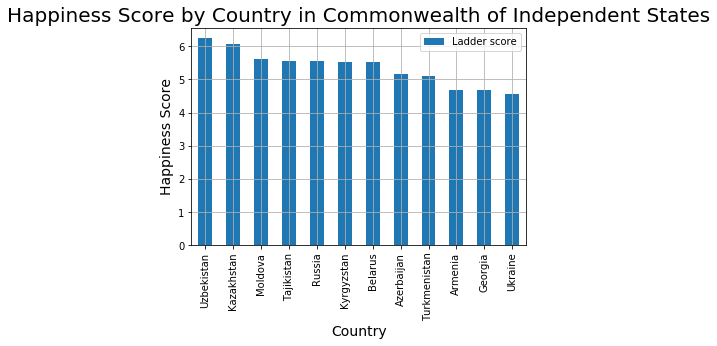

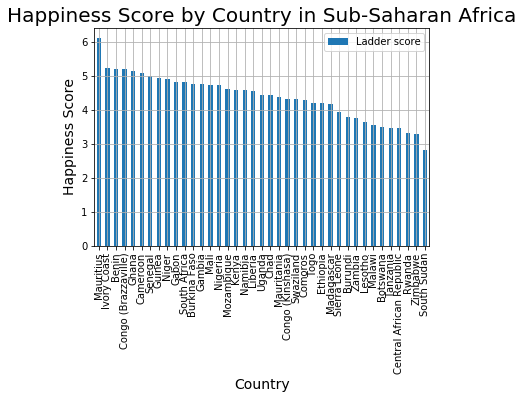

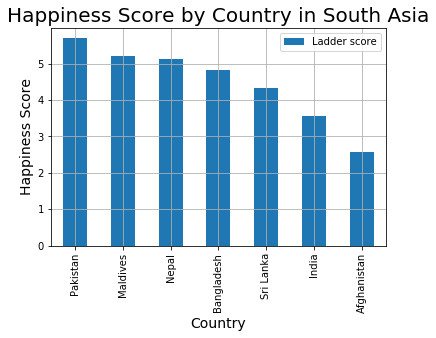

In [8]:
#visualize happiness score of each country by region
we.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in Western Europe", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

naa.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in North America and ANZ", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

mena.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in the Middle East and North Africa", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

lac.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in Latin America and the Caribbean", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

cee.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in Central and Eastern Europe", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

ea.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in East Asia", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

sea.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in Southeast Asia", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

cis.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in Commonwealth of Independent States", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

ssa.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in Sub-Saharan Africa", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

sa.plot(kind = "bar", x = "Country name", y = "Ladder score")
plt.title("Happiness Score by Country in South Asia", fontsize = 20)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Happiness Score", fontsize = 14)
plt.grid(True)
plt.show()

In [9]:
#NEXT: compare top country from each region with each other

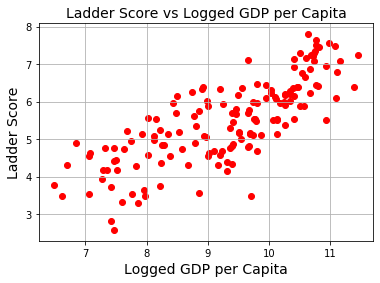

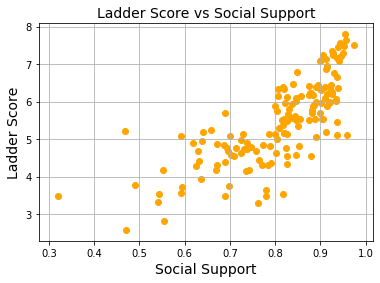

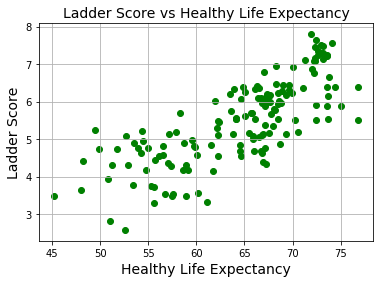

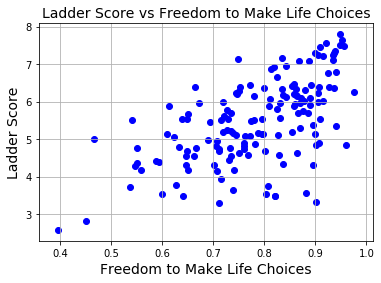

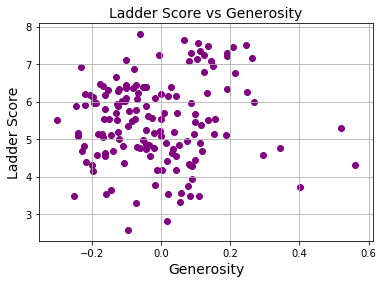

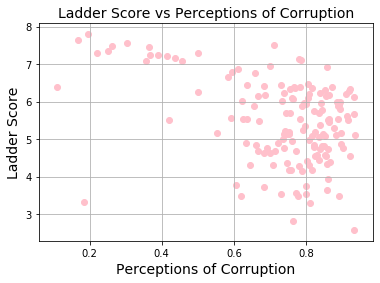

In [10]:
#check for linearity between independent and dependent variables
plt.scatter(df2020['Logged GDP per capita'], df2020['Ladder score'], color='red')
plt.title('Ladder Score vs Logged GDP per Capita', fontsize=14)
plt.xlabel('Logged GDP per Capita', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df2020['Social support'], df2020['Ladder score'], color='orange')
plt.title('Ladder Score vs Social Support', fontsize=14)
plt.xlabel('Social Support', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df2020['Healthy life expectancy'], df2020['Ladder score'], color='green')
plt.title('Ladder Score vs Healthy Life Expectancy', fontsize=14)
plt.xlabel('Healthy Life Expectancy', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df2020['Freedom to make life choices'], df2020['Ladder score'], color='blue')
plt.title('Ladder Score vs Freedom to Make Life Choices', fontsize=14)
plt.xlabel('Freedom to Make Life Choices', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df2020['Generosity'], df2020['Ladder score'], color='purple')
plt.title('Ladder Score vs Generosity', fontsize=14)
plt.xlabel('Generosity', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df2020['Perceptions of corruption'], df2020['Ladder score'], color='pink')
plt.title('Ladder Score vs Perceptions of Corruption', fontsize=14)
plt.xlabel('Perceptions of Corruption', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.grid(True)
plt.show()

In [11]:
#use linear regression to predict dependent variable happiness score based on 
#independent variables (all other metrics)

from sklearn import linear_model

x = df2020[['Logged GDP per capita','Social support', 'Healthy life expectancy', 
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df2020['Ladder score']
 
regmod = linear_model.LinearRegression()
regmod.fit(x, y)

print('Intercept: \n', regmod.intercept_)
print('Coefficients: \n', regmod.coef_)

inputGDP = 10.6
inputsocial = 0.9
inputhealhty = 71.9
inputfreedom = 0.95
inputgenerosity = -0.06
inputcorrupt = 0.2
print ('Predicted Happiness Score: \n', regmod.predict([[inputGDP, inputsocial, inputhealhty, inputfreedom,
                                                      inputgenerosity, inputcorrupt]]))

#NEXT: write out equation and observations (which predictors have most weight)
#NEXT: create graphic user interface to input values for prediction

Intercept: 
 -2.0593839
Coefficients: 
 [ 0.22908162  2.7233193   0.03530667  1.7768141   0.41056582 -0.62816256]
Predicted Happiness Score: 
 [6.89612485]


### <b>Multiple Linear Regression Model to Predict Happiness Score:<b>

Ladder score = -2.059 + 0.229(Logged GDP per capita) + 2.723(Social support) + 
                                0.035(Healhty life expectancy) + 1.777(Freedom to make life choices) +
                                0.411(Generosity) - 0.628(Perceptions of corruption)

Observations:
Social support and freedom to make life choices have the biggest impact on a country's happiness score


In [13]:
#read in happiness score data from 2019
df2019 = pd.read_csv("datasets_805654_1380888_happiness_2019.csv")
df2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [14]:
#read in happiness score data from 2018
df2018 = pd.read_csv("datasets_805654_1380888_happiness_2018.csv")
df2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [15]:
#read in happiness score data from 2017
df2017 = pd.read_csv("datasets_805654_1380888_happiness_2017.csv")
df2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [16]:
#read in happiness score data from 2016
df2016 = pd.read_csv("datasets_805654_1380888_happiness_2016.csv")
df2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [17]:
#read in happiness score data from 2015
df2015 = pd.read_csv("datasets_805654_1380888_happiness_2015.csv")
df2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [49]:
#create dictionary of each country's happiness score for each year from 2015 to 2020
countries = dict()
for country in df2020["Country name"]:
    countries[country] = []

for c in df2015["Country"]:
    if c not in countries.keys():
        countries[c] = []
    countries[c].append(df2015[df2015["Country"] == c]["Happiness Score"].values[0])

for c in df2016["Country"]:
    if c not in countries.keys():
        countries[c] = []
    countries[c].append(df2016[df2016["Country"] == c]["Happiness Score"].values[0])
    
for c in df2017["Country"]:
    if c not in countries.keys():
        countries[c] = []
    countries[c].append(df2017[df2017["Country"] == c]["Happiness.Score"].values[0])

for c in df2018["Country or region"]:
    if c not in countries.keys():
        countries[c] = []
    countries[c].append(df2018[df2018["Country or region"] == c]["Score"].values[0])

for c in df2019["Country or region"]:
    if c not in countries.keys():
        countries[c] = []
    countries[c].append(df2019[df2019["Country or region"] == c]["Score"].values[0])

for c in df2020["Country name"]:
    if c not in countries.keys():
        countries[c] = []
    countries[c].append(df2020[df2020["Country name"] == c]["Ladder score"].values[0])

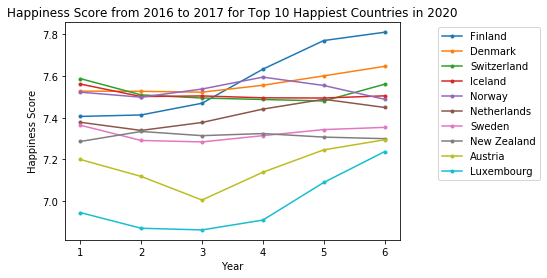

In [85]:
#plot happiness score from 2015 to 2020 for Top 10 Happiest Countries in 2020
for c, s in countries.items():
        if c in df2020.head(10)["Country name"].values:
            plt.plot(range(1, len(s) + 1), s, '.-', label=c)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score from 2015 to 2020 for Top 10 Happiest Countries in 2020")
plt.show()

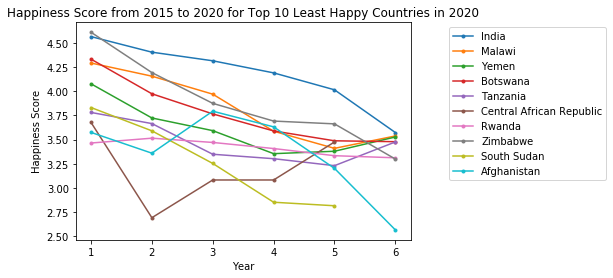

In [86]:
#plot happiness score from 2015 to 2020 for Top 10 Least Happy Countries in 2020
for c, s in countries.items():
        if c in df2020.tail(10)["Country name"].values:
            plt.plot(range(1, len(s) + 1), s, '.-', label=c)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score from 2015 to 2020 for Top 10 Least Happy Countries in 2020")
plt.show()

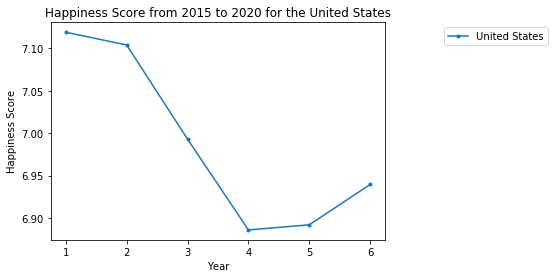

In [91]:
#plot happiness score from 2015 to 2020 for the United States
for c, s in countries.items():
        if c in df2020[df2020["Country name"] == "United States"].values:
            plt.plot(range(1, len(s) + 1), s, '.-', label=c)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score from 2015 to 2020 for the United States")
plt.show()

In [ ]:
#plot happiness score from 2015 to 2020 for Happiest Countries in Each Region in 2020
for c, s in countries.items():
        if ((c in we["Country name"].values[0]) || 
           (c in naa["Country name"].values[0]) ||
            (c in mena["Country name"].values[0]) ||
            (c in lac["Country name"]):
            plt.plot(range(1, len(s) + 1), s, '.-', label=c)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score from 2015 to 2020 for Top 10 Least Happy Countries in 2020")
plt.show()